In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mpg-analysis/mpg.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/mpg-analysis/mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.drop(["name"], axis = 1, inplace = True)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


#### Summary of the Dataset

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum().any()

False

In [13]:
df.shape

(392, 8)

**Univariate Analysis**

In [14]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

In [15]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

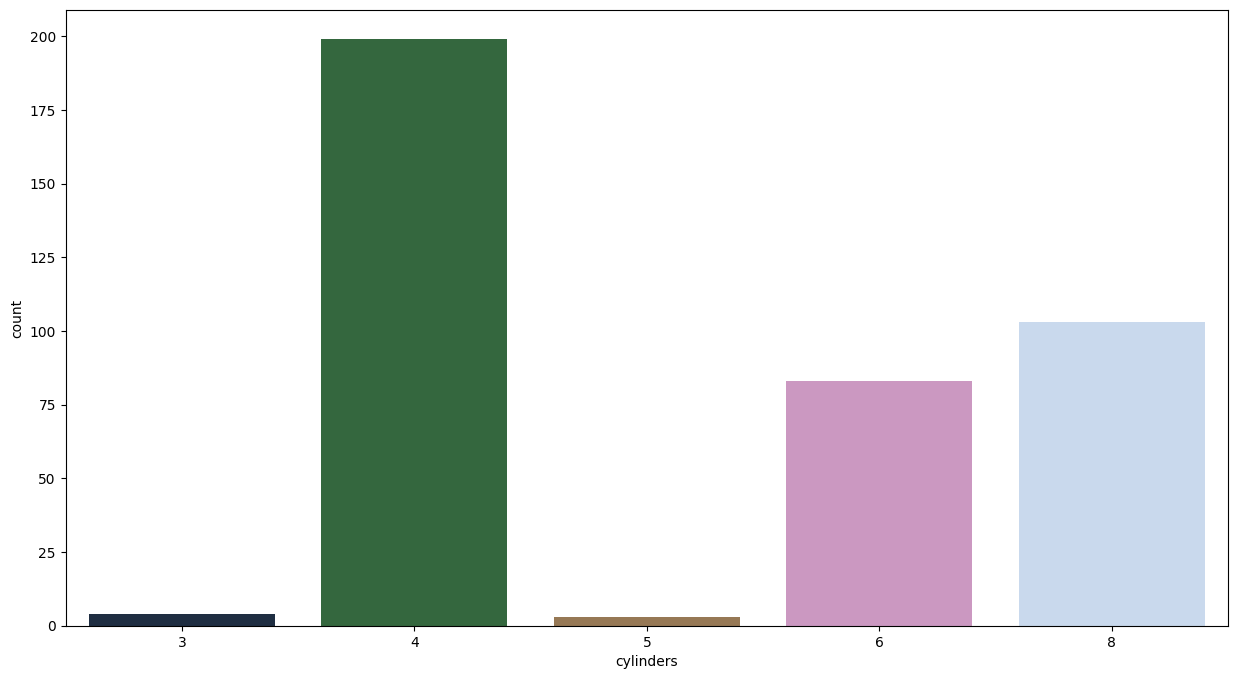

In [16]:
plt.figure(figsize = (15, 8))
sns.countplot(x="cylinders", data = df, palette = "cubehelix")
plt.show()

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [18]:
df["model_year"] = (1900 + df.model_year)

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


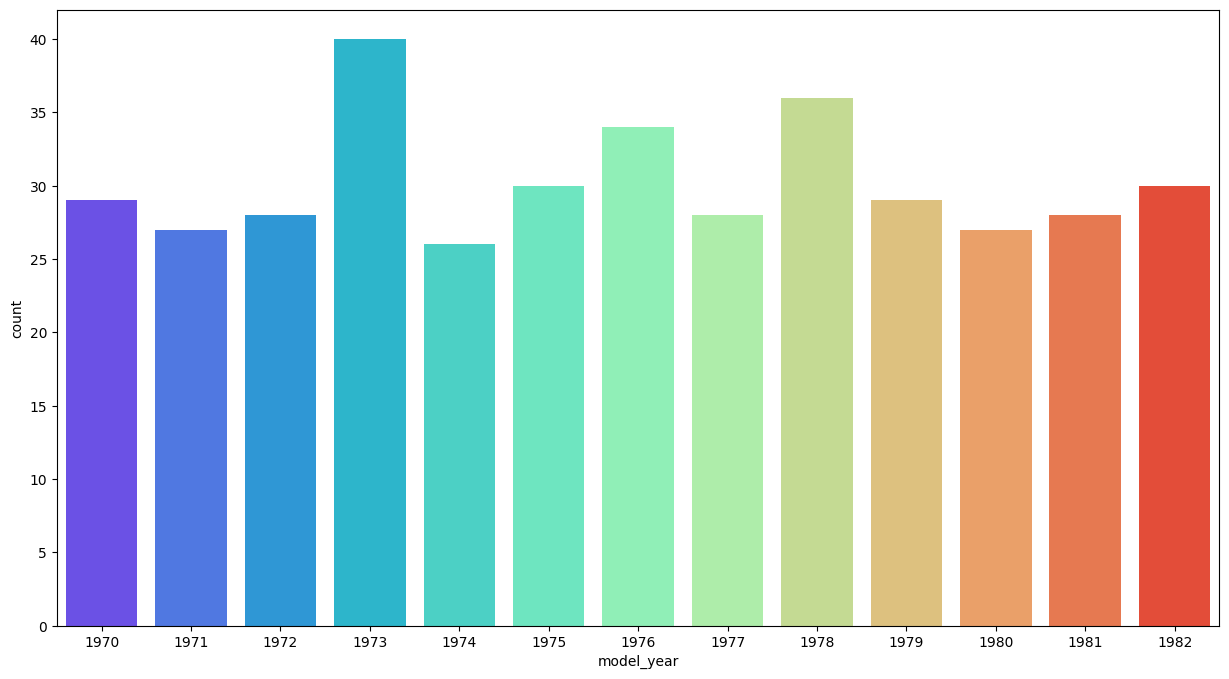

In [20]:
plt.figure(figsize = (15, 8))
sns.countplot(x="model_year", data = df, palette = "rainbow")
plt.show()

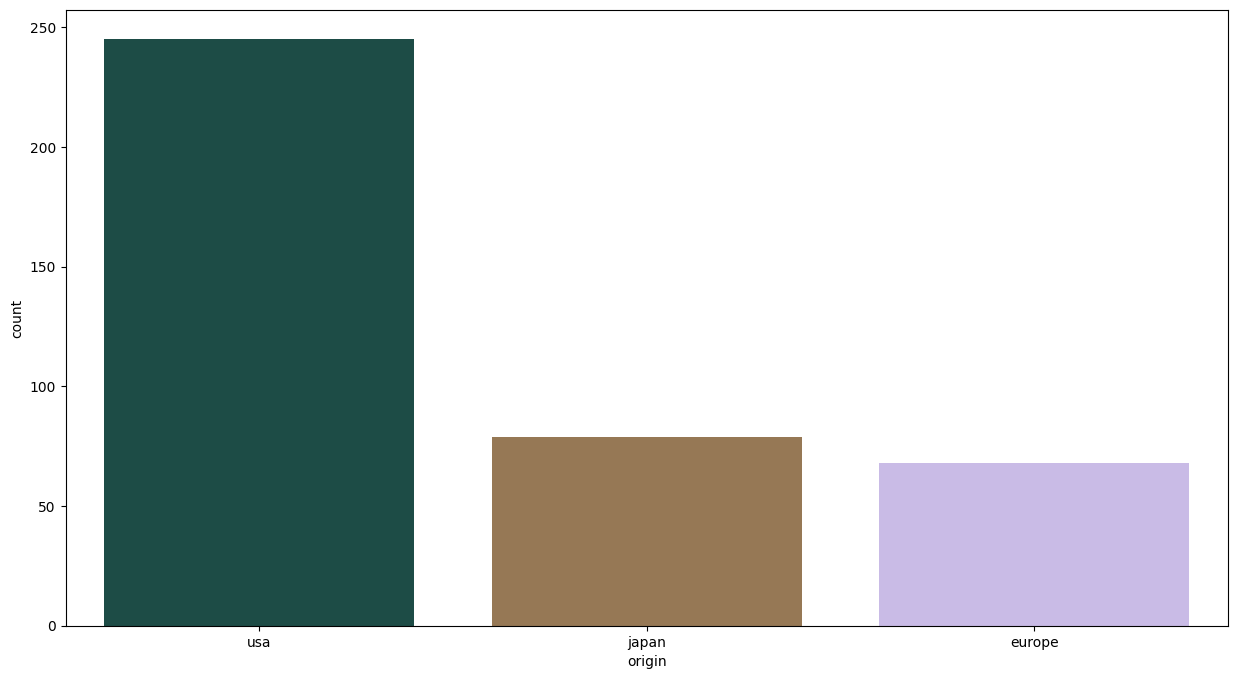

In [21]:
plt.figure(figsize = (15, 8))
sns.countplot(x="origin", data = df, palette = "cubehelix")
plt.show()

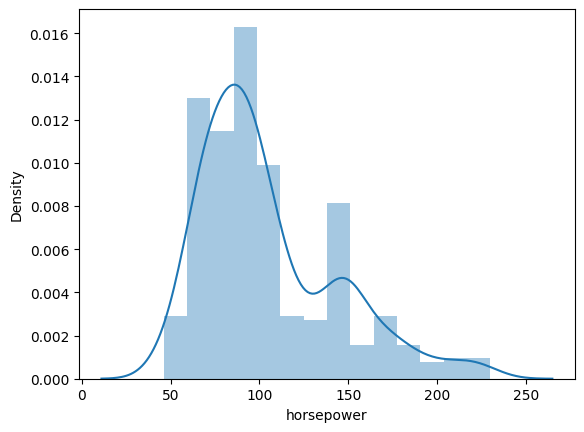

In [22]:
sns.distplot(df["horsepower"])
plt.show()

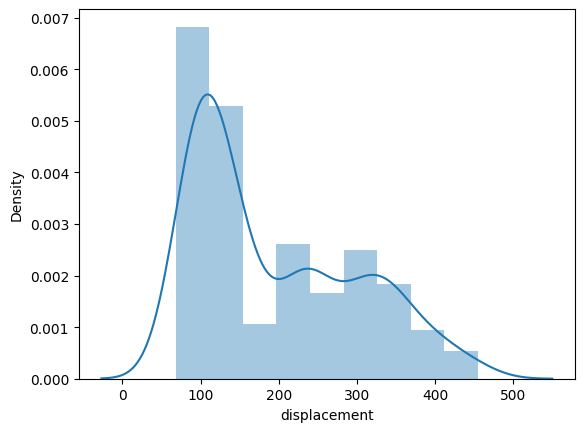

In [23]:
sns.distplot(df["displacement"])
plt.show()

**Bivariate Analysis**

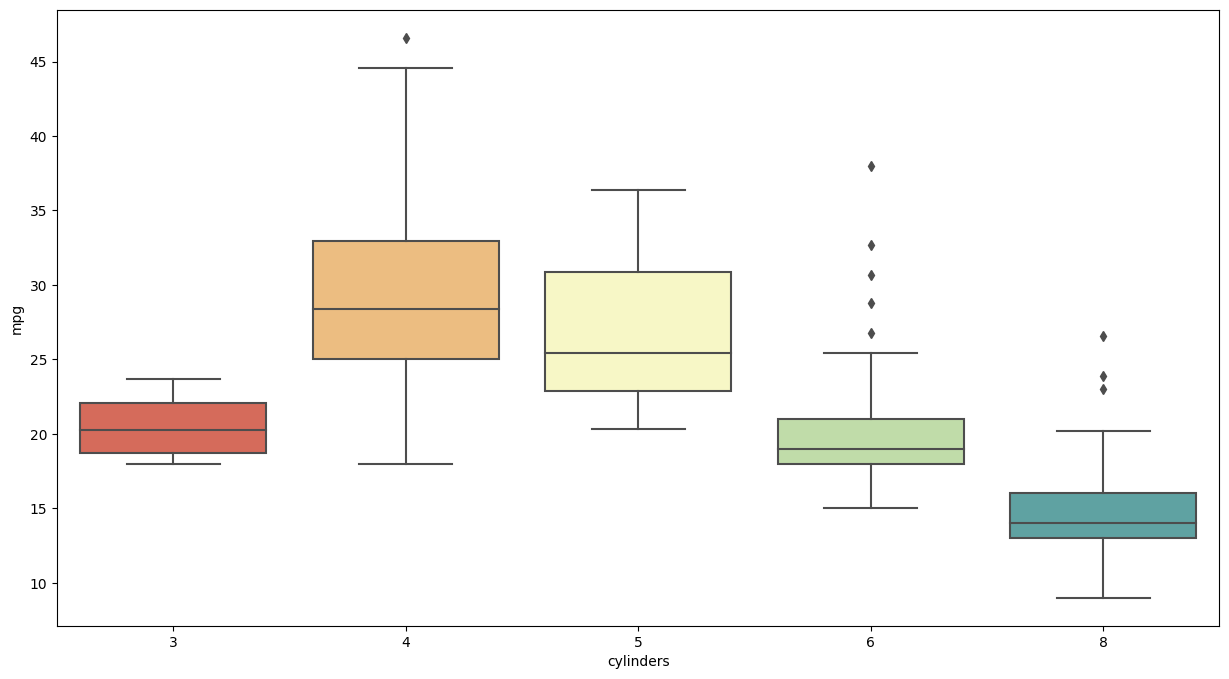

In [24]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "cylinders", y ="mpg", data = df, palette = "Spectral")
plt.show()

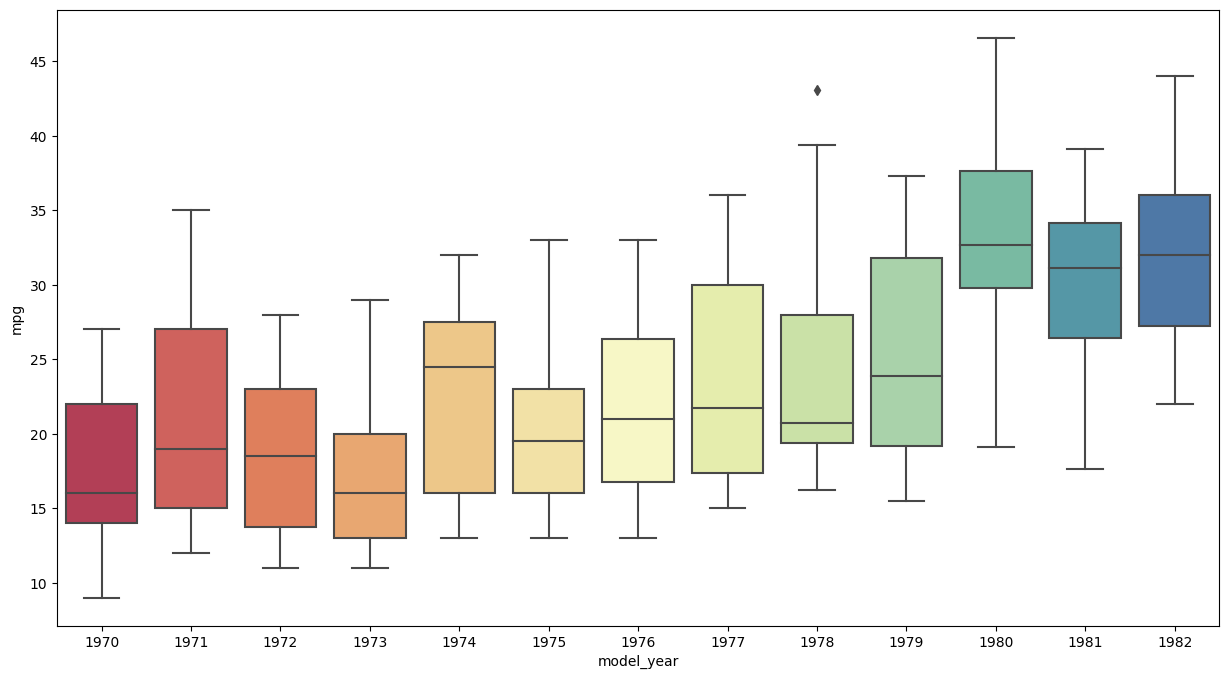

In [25]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "model_year", y ="mpg", data = df, palette = "Spectral")
plt.show()

**Multivariate Anaysis**

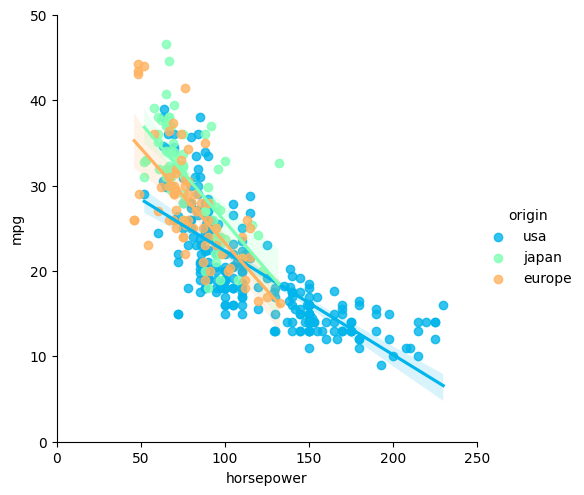

In [26]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (0, 250))
graph.set(ylim = (0, 50))

plt.show()

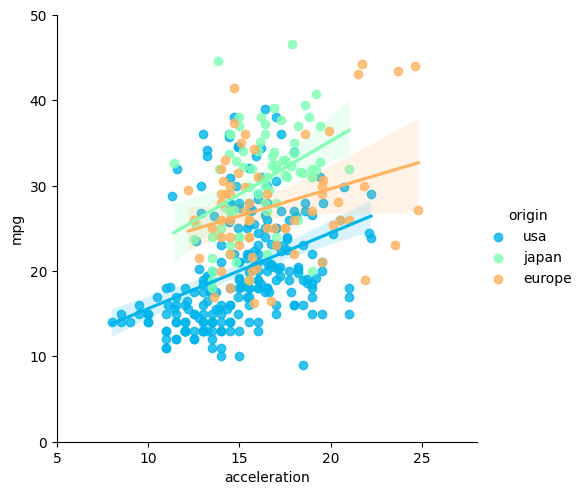

In [27]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (5, 28))
graph.set(ylim = (0, 50))

plt.show()

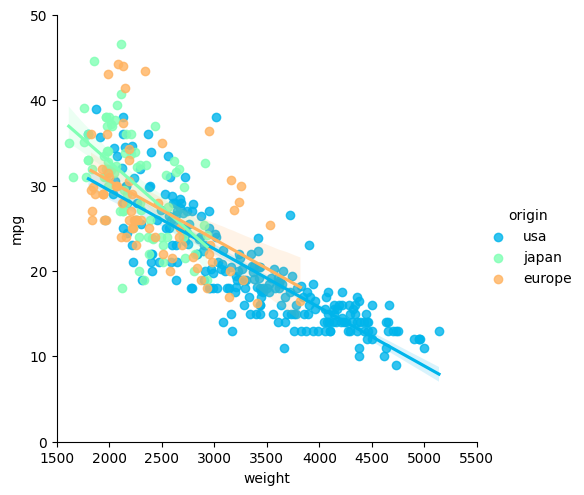

In [28]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (1500, 5500))
graph.set(ylim = (0, 50))

plt.show()

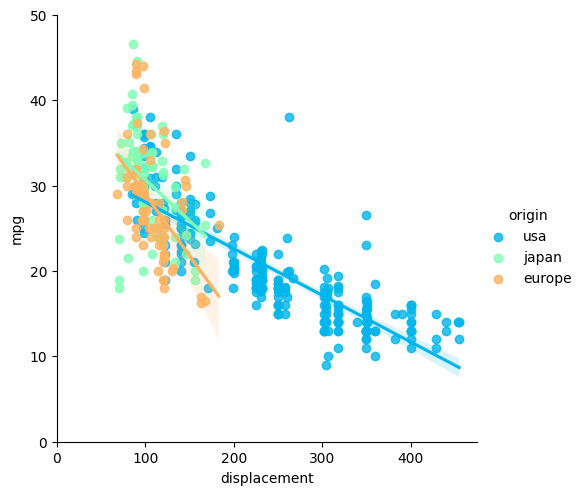

In [29]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (0, 475))
graph.set(ylim = (0, 50))

plt.show()

**Heatmap of Correlation Matrix**

In [30]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


In [31]:
df1 = df.drop('origin', axis = 1)

In [32]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,1970
1,15.0,8,350.0,165.0,3693,11.5,1970
2,18.0,8,318.0,150.0,3436,11.0,1970
3,16.0,8,304.0,150.0,3433,12.0,1970
4,17.0,8,302.0,140.0,3449,10.5,1970


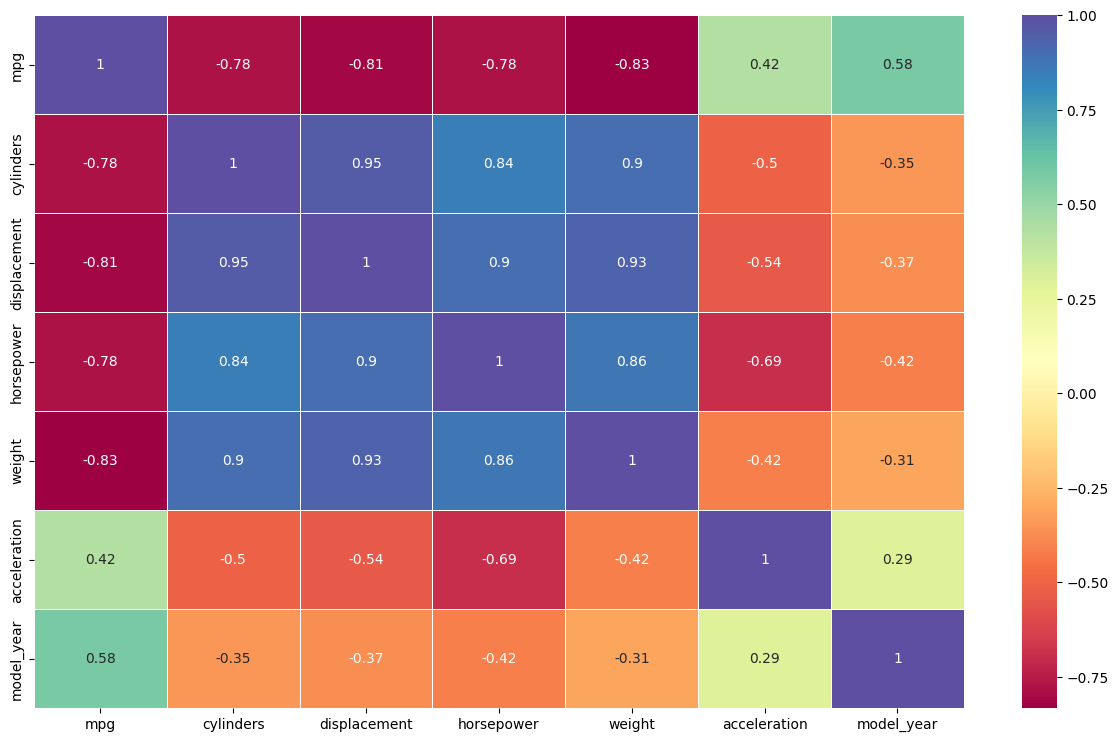

In [33]:
plt.figure(figsize = (15, 9))
sns.heatmap(df1.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [34]:
df1.drop(["acceleration", "displacement"], axis = 1, inplace = True)

In [35]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)

In [36]:
df1.head()

,mpg,cylinders,horsepower,weight,model_year
0,18.0,8,130.0,3504,1970
1,15.0,8,165.0,3693,1970
2,18.0,8,150.0,3436,1970
3,16.0,8,150.0,3433,1970
4,17.0,8,140.0,3449,1970


In [37]:
from datetime import datetime

In [38]:
today = datetime.today()

In [39]:
today

datetime.datetime(2024, 9, 6, 14, 27, 25, 825454)

In [40]:
this_yr = today.year
this_yr

2024

In [41]:
df1["age"] = this_yr - df1.model_year

In [42]:
df1.drop(["model_year"], axis = 1, inplace = True)

In [43]:
df1.head()

,mpg,cylinders,horsepower,weight,age
0,18.0,8,130.0,3504,54
1,15.0,8,165.0,3693,54
2,18.0,8,150.0,3436,54
3,16.0,8,150.0,3433,54
4,17.0,8,140.0,3449,54


**Performing the same analysis for the original dataframe**

In [44]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [45]:
df["age"] = this_yr - df.model_year

In [46]:
df.drop(["model_year"], axis = 1, inplace = True)

In [47]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [48]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [49]:
df = pd.get_dummies(df, drop_first = True, dtype = int)

In [50]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


**Modelling**

In [51]:
X = df.drop(["mpg"], axis = 1)
y = df["mpg"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,0,1
184,4,92.0,2572,48,0,1
174,6,97.0,2984,49,0,1
64,8,150.0,4135,52,0,1
344,4,64.0,1875,43,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,52,0,1
107,6,100.0,2789,51,0,1
272,4,85.0,2855,46,0,1
352,4,65.0,2380,43,0,1


In [55]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

**Machine Learning Model**

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm_model = LinearRegression()

In [58]:
lm_model.fit(X_train, y_train)

LinearRegression()

In [59]:
lm_model.intercept_

79.80442103966979

In [60]:
coef_param = pd.DataFrame(lm_model.coef_,index = X.columns, columns = ["Coefficient"] )
coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


**How Accurate is the Model (or these numbers above?)**

In [61]:
y_pred = lm_model.predict(X_test)

In [62]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [63]:
compare.sample(10)

,Actual,Pred
78,21.0,21.764759
115,15.0,13.832570
389,22.0,28.056267
291,19.2,21.527543
165,20.0,20.819971
74,13.0,11.908848
40,14.0,11.747138
335,35.0,30.734004
83,28.0,24.147781
22,25.0,23.552078


**Evaluate the Performance Using Metrics which are Mean Absolute Error**

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    
    return print("r2_score:", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, "\n", "rmse:", RMSE)

In [66]:
evaluation_metrics(y_test, y_pred)

r2_score: 0.7798249880881913 
 mae: 2.518828157615086 
 mse: 11.237861022823028 
 rmse: 3.3522919059686656


In [67]:
#!pip install yellowbrick

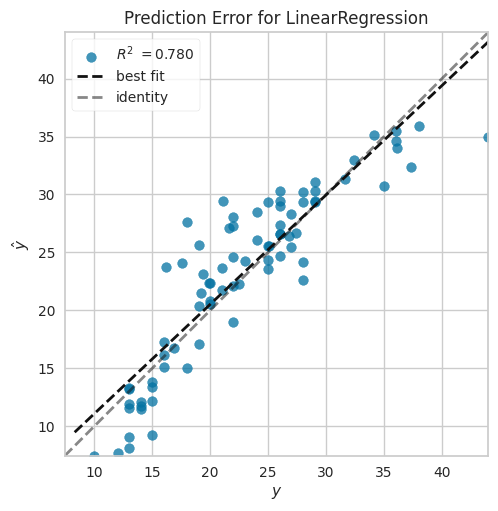

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [68]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

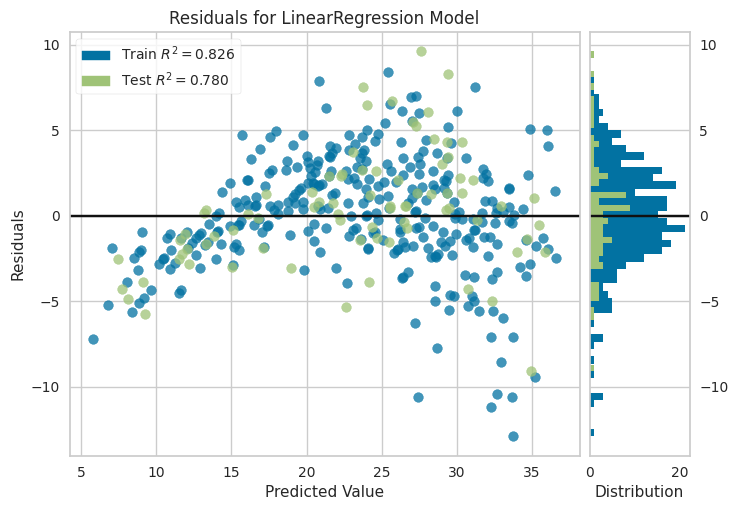

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()